# Stock vs Precious Metals Price Analysis

This notebook compares stock prices relative to gold and silver prices, with S&P 500 as a benchmark.

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [22]:
def fetch_price_data(ticker, period='2y'):
    """
    Fetch historical price data for a given ticker
    """
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period=period)
        return data['Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

def normalize_series(series):
    """
    Normalize a price series to start at 100
    """
    return (series / series.iloc[0]) * 100

In [23]:
# Input stock ticker
stock_ticker = input("Enter stock ticker (e.g., AAPL, MSFT, TSLA): ").upper().strip()
print(f"Analyzing {stock_ticker}...")

Enter stock ticker (e.g., AAPL, MSFT, TSLA):  MSFT


Analyzing MSFT...


In [24]:
# Fetch data for stock, gold, silver, and S&P 500
print("Fetching price data...")

stock_data = fetch_price_data(stock_ticker)
gold_data = fetch_price_data('GC=F')  # Gold futures
silver_data = fetch_price_data('SI=F')  # Silver futures
sp500_data = fetch_price_data('^GSPC')  # S&P 500

# Check if all data was fetched successfully
if any(data is None for data in [stock_data, gold_data, silver_data, sp500_data]):
    print("Error: Could not fetch all required data. Please check tickers and try again.")
else:
    print("Data fetched successfully!")

Fetching price data...
Data fetched successfully!


In [25]:
# Align data to common dates
df = pd.DataFrame({
    'Stock': stock_data,
    'Gold': gold_data,
    'Silver': silver_data,
    'SP500': sp500_data
}).dropna()

print(f"Data range: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Number of trading days: {len(df)}")

Data range: 2023-08-28 to 2025-08-27
Number of trading days: 502


In [26]:
# Calculate ratios
df['Stock_to_Gold'] = df['Stock'] / df['Gold']
df['Stock_to_Silver'] = df['Stock'] / df['Silver']
df['SP500_to_Gold'] = df['SP500'] / df['Gold']
df['SP500_to_Silver'] = df['SP500'] / df['Silver']

# Normalize all ratios to start at 100
ratios_df = pd.DataFrame({
    f'{stock_ticker}/Gold': normalize_series(df['Stock_to_Gold']),
    f'{stock_ticker}/Silver': normalize_series(df['Stock_to_Silver']),
    'S&P500/Gold': normalize_series(df['SP500_to_Gold']),
    'S&P500/Silver': normalize_series(df['SP500_to_Silver'])
})

print("Ratios calculated and normalized!")

Ratios calculated and normalized!


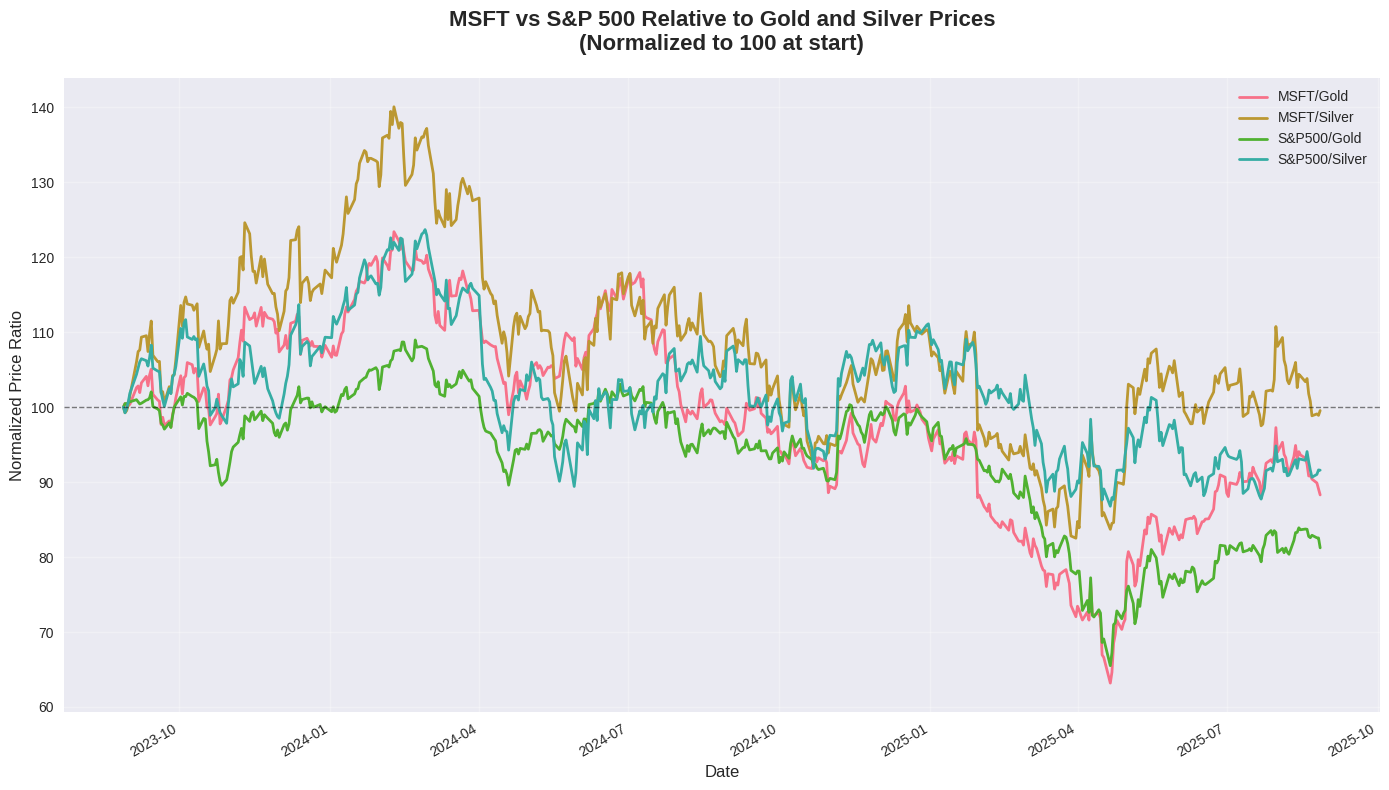

In [27]:
# Create the main comparison chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all normalized ratios
ratios_df.plot(ax=ax, linewidth=2)

ax.set_title(f'{stock_ticker} vs S&P 500 Relative to Gold and Silver Prices\n(Normalized to 100 at start)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Price Ratio', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10, loc='best')

# Add horizontal reference line at 100
ax.axhline(y=100, color='black', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

In [ ]:
# Create subplot comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Stock vs Gold
ax1.plot(ratios_df.index, ratios_df[f'{stock_ticker}/Gold'], color='gold', linewidth=2)
ax1.set_title(f'{stock_ticker} / Gold Price Ratio')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# Stock vs Silver
ax2.plot(ratios_df.index, ratios_df[f'{stock_ticker}/Silver'], color='silver', linewidth=2)
ax2.set_title(f'{stock_ticker} / Silver Price Ratio')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# S&P 500 vs Gold
ax3.plot(ratios_df.index, ratios_df['S&P500/Gold'], color='blue', linewidth=2)
ax3.set_title('S&P 500 / Gold Price Ratio')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# S&P 500 vs Silver
ax4.plot(ratios_df.index, ratios_df['S&P500/Silver'], color='purple', linewidth=2)
ax4.set_title('S&P 500 / Silver Price Ratio')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=100, color='black', linestyle='--', alpha=0.5)

plt.suptitle(f'Individual Ratio Analysis: {stock_ticker} vs S&P 500 Relative to Precious Metals', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics
print(f"\n=== SUMMARY STATISTICS ({stock_ticker}) ===")
print(f"Analysis Period: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Trading Days: {len(df)}")

print("\n--- Final Ratio Values (Normalized) ---")
for col in ratios_df.columns:
    final_value = ratios_df[col].iloc[-1]
    change = final_value - 100
    print(f"{col:15}: {final_value:7.2f} ({change:+6.2f})")

print("\n--- Volatility (Standard Deviation) ---")
for col in ratios_df.columns:
    volatility = ratios_df[col].std()
    print(f"{col:15}: {volatility:7.2f}")

print("\n--- Performance vs S&P 500 ---")
stock_gold_perf = ratios_df[f'{stock_ticker}/Gold'].iloc[-1] - 100
sp500_gold_perf = ratios_df['S&P500/Gold'].iloc[-1] - 100
gold_outperformance = stock_gold_perf - sp500_gold_perf

stock_silver_perf = ratios_df[f'{stock_ticker}/Silver'].iloc[-1] - 100
sp500_silver_perf = ratios_df['S&P500/Silver'].iloc[-1] - 100
silver_outperformance = stock_silver_perf - sp500_silver_perf

print(f"{stock_ticker} vs S&P500 (Gold-adjusted):   {gold_outperformance:+7.2f} points")
print(f"{stock_ticker} vs S&P500 (Silver-adjusted): {silver_outperformance:+7.2f} points")

In [ ]:
# Display recent data
print("\n=== RECENT DATA (Last 10 Trading Days) ===")
recent_data = ratios_df.tail(10).round(2)
print(recent_data.to_string())